# Customer Lifetime Value (CLTV)

Customer Lifetime Value là giá trị tiền tệ thể hiện số doanh thu hoặc lợi nhuận mà khách hàng sẽ mang lại cho công ty trong suốt thời gian gắn bó. CLTV thể hiện ý nghĩa của việc thu hút khách hàng dài hạn so với khách hàng ngắn hạn. Giá trị trọn đời của khách hàng (CLV) có thể giúp chúng ta trả lời những câu hỏi quan trọng nhất về hoạt động kinh doanh cho mọi công ty.

## Calculate Customer Lifetime Value

CLTV có thể triển khai bằng các giá trị RFM(Recency, Frequency, Monetary).

Công thức tính CLTV như sau: ((Giá trị trung bình của giao dịch x Tần xuất giao dịch)/Tỷ lệ rời bỏ) x Tỷ suất lợi nhuận

- Giá trị khách hàng(Customer value) = Giá trị trung bình của giao dịch x Tần suất giao dịch
- Giá trị bình của giao dịch(Average transaction value - ATV): Tổng của tổng giá trị đặt cược / Tổng số lần giao dịch đặt cược. ATV thể hiện số tiền đặt cược trung bình mà khách hàng chi tiêu cho một giao dịch đó.
- Tần xuất giao dịch/đặt cược(Transaction Frequecy) = Tổng số lần đặt cược/Tổng số khách hàng. Chỉ số này thể hiện trung bình số lần đặt cược của mỗi khách hàng.
- Tỷ lệ rời bỏ(Churn rate): Tỷ lệ rời bỏ là phần trăm khách hàng không đặt cược lại nữa.
- Customer Lifetime = 1/Churn rate
- Churn rate = 1 - Repeat Rate(Tỷ lệ khách hàng quay lại)

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import plotly.express as px

In [ ]:
df = pd.read_csv('../dataset/TAB_Betting_Data_cleaned.csv').drop(columns=['Unnamed: 0'])

In [ ]:
df.head()

,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS,DAY_OF_WEEK_FULL,GENDER_FULL
0,2021-01-01,Fri,13154,67.0,65+,M,11846,WA,37.0,0.0,1081.0,0.0,1118.0,443.55,271.254275,288,Friday,Male
1,2021-01-01,Fri,18379,54.0,45-54,M,1884,WA,40.0,0.0,0.0,0.0,40.0,0.00,40.000000,1,Friday,Male
2,2021-01-01,Fri,559232,63.0,55-64,M,2866,WA,0.0,0.0,12.0,0.0,12.0,9.50,2.041720,5,Friday,Male
3,2021-01-01,Fri,698904,69.0,65+,M,2100,WA,0.0,0.0,1223.5,0.0,1223.5,267.91,245.117147,40,Friday,Male
4,2021-01-01,Fri,762921,67.0,65+,M,4766,WA,0.0,0.0,17.5,0.0,17.5,0.00,3.504075,5,Friday,Male


- Tính số ngày giữa ngày đặt hàng đầu tiên và ngày đặt hàng cuối cùng của mỗi khách hàng.(Số ngày khách hàng ở lại sử dụng các dịch vụ cá cược bên WA TAB)
- Tính số lượng đơn đặt cược cho mỗi khách hàng.
- Tính tổng giá đặt cược cho từng khách hàng.

In [ ]:
df['DATE_DIM'] = pd.to_datetime(df['DATE_DIM'])

In [ ]:
df.loc[df['BET_ACCOUNT_NUM_HASH']==762921]['DATE_DIM'].min()

'2021-01-01'

In [ ]:
df.BET_ACCOUNT_NUM_HASH.nunique()

144869

In [ ]:
df_cltv = df.groupby('BET_ACCOUNT_NUM_HASH').agg({'DATE_DIM': lambda date: (date.max() - date.min()).days,
                                                  'GROSS_MARGIN': lambda x: x.sum(),
                                                  'TOTAL_TURNOVER': lambda price: price.sum()}).reset_index()

In [ ]:
df_cltv.head()

,BET_ACCOUNT_NUM_HASH,DATE_DIM,GROSS_MARGIN,TOTAL_TURNOVER
0,13154,729,81925.965516,366186.08
1,18379,729,6645.733653,32033.00
2,37251,0,-689.654776,100.00
3,129273,358,5.550000,155.00
4,348318,106,27.581731,30.00


In [ ]:
df_cltv=df_cltv.merge(df.groupby('BET_ACCOUNT_NUM_HASH')['DATE_DIM'].count().rename("Frequency").reset_index(), on='BET_ACCOUNT_NUM_HASH')

In [ ]:
df_cltv

,BET_ACCOUNT_NUM_HASH,DATE_DIM,GROSS_MARGIN,TOTAL_TURNOVER,Frequency
0,13154,729,81925.965516,366186.08,463
1,18379,729,6645.733653,32033.00,199
2,37251,0,-689.654776,100.00,1
3,129273,358,5.550000,155.00,16
4,348318,106,27.581731,30.00,4
...,...,...,...,...,...
144864,4294834703,722,32669.965890,175772.30,335
144865,4294891076,729,15301.435310,72043.91,535
144866,4294928673,0,2.380160,8.00,1
144867,4294964456,0,30.326392,67.00,1


In [ ]:
df_cltv.columns=['BET_ACCOUNT_NUM_HASH','num_days', 'gross_margin','spent_money', 'frequency']

In [ ]:
df_cltv

,BET_ACCOUNT_NUM_HASH,num_days,gross_margin,spent_money,frequency
0,13154,729,81925.965516,366186.08,463
1,18379,729,6645.733653,32033.00,199
2,37251,0,-689.654776,100.00,1
3,129273,358,5.550000,155.00,16
4,348318,106,27.581731,30.00,4
...,...,...,...,...,...
144864,4294834703,722,32669.965890,175772.30,335
144865,4294891076,729,15301.435310,72043.91,535
144866,4294928673,0,2.380160,8.00,1
144867,4294964456,0,30.326392,67.00,1


### Calculate CLTV

CLTV = ((Average Transaction Value x Transaction Frequency)/Churn Rate) x gross margin

Customer Value = Average Transaction Value x Transaction Frequency

In [ ]:
df[df['BET_ACCOUNT_NUM_HASH']==348318]

,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS,DAY_OF_WEEK_FULL,GENDER_FULL
8784728,2022-06-10,Fri,348318,29.0,25-34,U,0,WA,9.0,0.0,1.0,0.0,10.0,0.0,9.225266,7,Friday,Undefined
9825553,2022-08-13,Sat,348318,29.0,25-34,U,64,WA,8.0,0.0,2.0,0.0,10.0,0.0,8.356464,4,Saturday,Undefined
10496602,2022-09-23,Fri,348318,29.0,25-34,U,105,WA,5.0,0.0,0.0,0.0,5.0,0.0,5.000000,4,Friday,Undefined
10515547,2022-09-24,Sat,348318,29.0,25-34,U,106,WA,0.0,5.0,0.0,0.0,5.0,0.0,5.000000,2,Saturday,Undefined


In [ ]:
df_cltv['avg_tran_value']=df_cltv['spent_money']/df_cltv['frequency']
df_cltv.head()

,BET_ACCOUNT_NUM_HASH,num_days,gross_margin,spent_money,frequency,avg_tran_value
0,13154,729,81925.965516,366186.08,463,790.898661
1,18379,729,6645.733653,32033.00,199,160.969849
2,37251,0,-689.654776,100.00,1,100.000000
3,129273,358,5.550000,155.00,16,9.687500
4,348318,106,27.581731,30.00,4,7.500000


#### Calculate Transaction Frequency

In [ ]:
transaction_frequency=sum(df_cltv['frequency'])/df_cltv.shape[0]
transaction_frequency

85.3467684597809

#### Calculate repeat rate and Churn rate

In [ ]:
# Repeat Rate
repeat_rate=df_cltv[df_cltv.frequency > 1].shape[0]/df_cltv.shape[0]
#Churn Rate
churn_rate=1-repeat_rate
repeat_rate,churn_rate

(0.8684535683962753, 0.1315464316037247)

In [ ]:
# Customer Value
df_cltv['CLV']=(df_cltv['avg_tran_value']*transaction_frequency)/churn_rate

#Customer Lifetime Value
df_cltv['cust_lifetime_value']=df_cltv['CLV']*df_cltv['gross_margin']

df_cltv.head()

,BET_ACCOUNT_NUM_HASH,num_days,gross_margin,spent_money,frequency,avg_tran_value,CLV,cust_lifetime_value
0,13154,729,81925.965516,366186.08,463,790.898661,513131.706156,4.203881e+10
1,18379,729,6645.733653,32033.00,199,160.969849,104436.557382,6.940575e+08
2,37251,0,-689.654776,100.00,1,100.000000,64879.577058,-4.474451e+07
3,129273,358,5.550000,155.00,16,9.687500,6285.209028,3.488291e+04
4,348318,106,27.581731,30.00,4,7.500000,4865.968279,1.342118e+05


# RFM

In [ ]:
df.head()

,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS,DAY_OF_WEEK_FULL,GENDER_FULL
0,2021-01-01,Fri,13154,67.0,65+,M,11846,WA,37.0,0.0,1081.0,0.0,1118.0,443.55,271.254275,288,Friday,Male
1,2021-01-01,Fri,18379,54.0,45-54,M,1884,WA,40.0,0.0,0.0,0.0,40.0,0.00,40.000000,1,Friday,Male
2,2021-01-01,Fri,559232,63.0,55-64,M,2866,WA,0.0,0.0,12.0,0.0,12.0,9.50,2.041720,5,Friday,Male
3,2021-01-01,Fri,698904,69.0,65+,M,2100,WA,0.0,0.0,1223.5,0.0,1223.5,267.91,245.117147,40,Friday,Male
4,2021-01-01,Fri,762921,67.0,65+,M,4766,WA,0.0,0.0,17.5,0.0,17.5,0.00,3.504075,5,Friday,Male


In [ ]:
df['DATE_DIM'].max()

Timestamp('2022-12-31 00:00:00')

Để triển khai phân tích RFM, cần xử lý thêm dữ liệu được thiết lập theo các bước sau:

- Để tính toán lần đặt cược gần đây nhất(R), tôi đã xem xét dữ liệu giao dịch của lần đặt gần đây nhất. Ngày hóa đơn cuối cùng là 2022-12-31, đây là ngày gần đây nhất. Để tính các lần gần đây khác, tôi sẽ trừ đi mỗi ngày kể từ ngày hôm sau. Nếu dữ liệu là dữ liệu real-time thì sẽ để là ngày hiện tại.
- Chỉ số tần xuất(F) sẽ tính giống với số lần giao dịch trong CLTV.
- Tương tự với giá trị tiền tệ(M) sẽ giống trường spent_money trong CLTV.


In [ ]:
last_day = df['DATE_DIM'].max() + pd.DateOffset(days=1)
last_trans = df.groupby('BET_ACCOUNT_NUM_HASH').agg({'DATE_DIM': 'max'}).reset_index()
last_trans.rename(columns={'DATE_DIM':'last_transaction'},inplace=True)
recency = df.groupby('BET_ACCOUNT_NUM_HASH').agg({'DATE_DIM': lambda date: (last_day - date.max()).days}).reset_index()

In [ ]:
recency.head()

,BET_ACCOUNT_NUM_HASH,DATE_DIM
0,13154,1
1,18379,1
2,37251,61
3,129273,13
4,348318,99


In [ ]:
df_rfm=recency.merge(df_cltv[['BET_ACCOUNT_NUM_HASH','frequency','spent_money', 'avg_tran_value']], on='BET_ACCOUNT_NUM_HASH')
df_rfm.columns = ['BET_ACCOUNT_NUM_HASH', 'recency', 'frequency', 'monetary']

In [ ]:
df_rfm=df_rfm.merge(last_trans, on='BET_ACCOUNT_NUM_HASH')

In [ ]:
df_rfm.head()

,BET_ACCOUNT_NUM_HASH,recency,frequency,monetary,avg_tran_value,last_transaction
0,13154,1,463,366186.08,790.898661,2022-12-31
1,18379,1,199,32033.00,160.969849,2022-12-31
2,37251,61,1,100.00,100.000000,2022-11-01
3,129273,13,16,155.00,9.687500,2022-12-19
4,348318,99,4,30.00,7.500000,2022-09-24


Kiểm tra xem khách hàng mua hàng gần đây có mang lại nhiều lợi nhuận hơn không

In [ ]:
fig = px.scatter(df_rfm, x='recency', y='monetary', color='monetary', size='monetary')
fig.show('notebook')

In [ ]:
# Define scoring criteria for each RFM value
recency_scores = [3, 2, 1]
frequency_scores = [1, 2, 3]
monetary_scores = [1, 2, 3]

# Calculate RFM scores
df_rfm['RecencyScore'] = pd.cut(df_rfm['recency'], bins=3, labels=recency_scores)
df_rfm['FrequencyScore'] = pd.cut(df_rfm['frequency'], bins=3, labels=frequency_scores)
df_rfm['MonetaryScore'] = pd.cut(df_rfm['monetary'], bins=3, labels=monetary_scores)

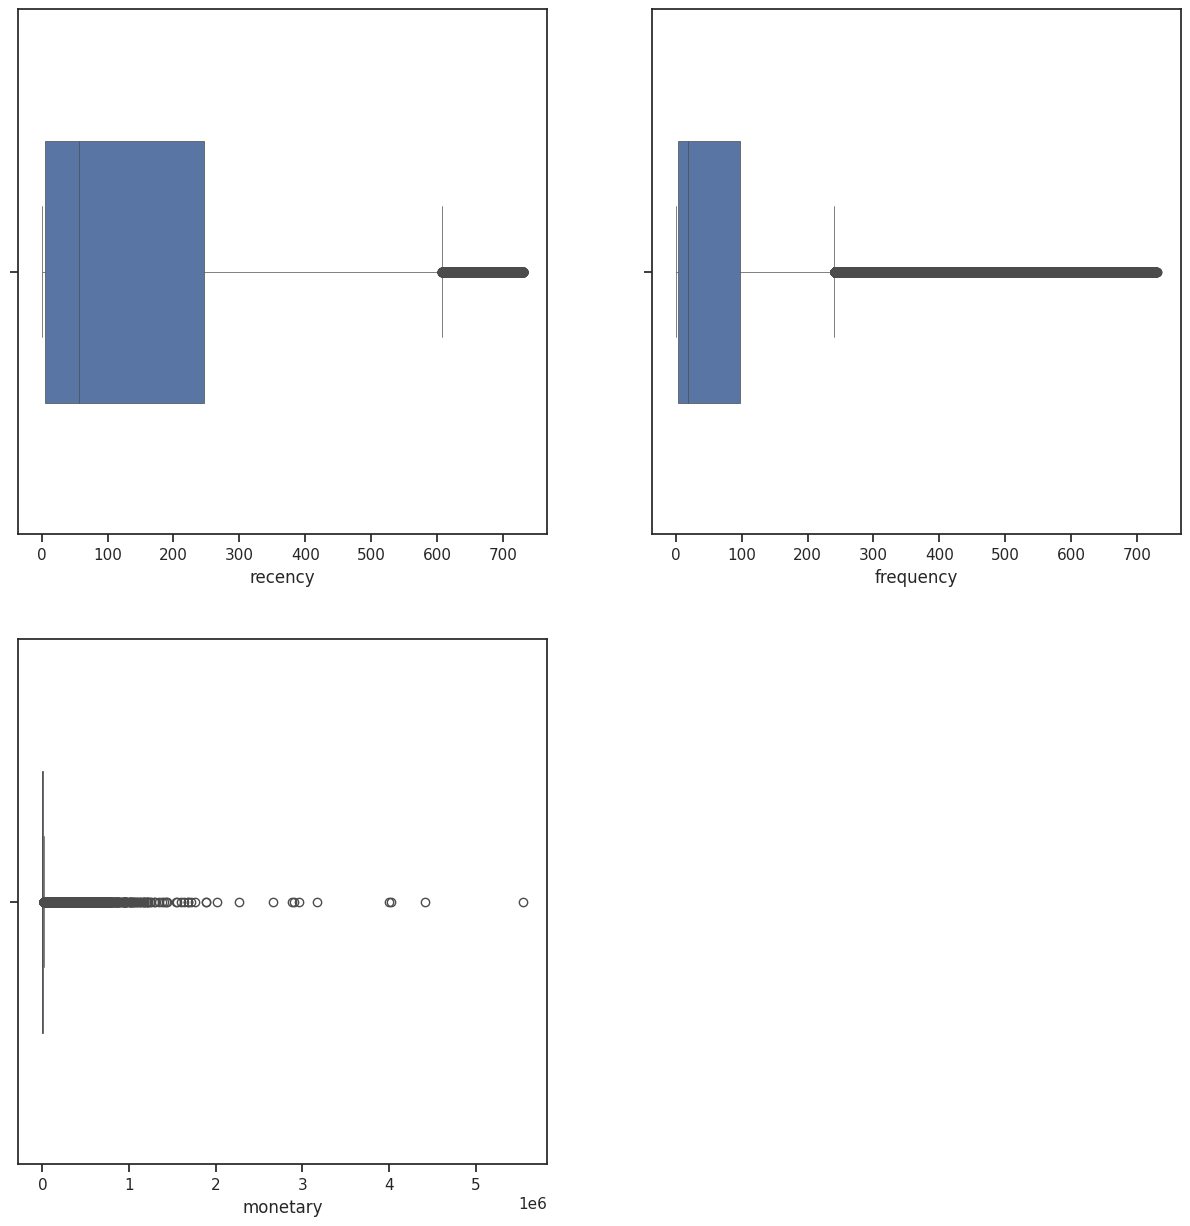

In [ ]:
# check outliner
columns = ['recency', 'frequency', 'monetary']
length = len(columns)
sns.set_theme(style="ticks")
# Draw box plot
fig = plt.figure(figsize=[15, 15])
for idx, col in zip(range(length+1), columns):
    ax = plt.subplot(2, 2, idx+1)
    # No need remove outlier in statistical part
    sns.boxplot(x=df_rfm[col], width=.5, ax=ax, linewidth=.5, legend=False)

In [ ]:
# #Remove outliner
# def remove_outlier(df_in, col_name, n_q1, n_q3):
#     q1 = df_in[col_name].quantile(n_q1)
#     q3 = df_in[col_name].quantile(n_q3)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out

In [ ]:
# df_rfm_remove_outlier = remove_outlier(df_rfm, 'monetary', 0.05, 0.75)
# df_rfm_remove_outlier = remove_outlier(df_rfm, 'frequency', 0.05, 0.75)
# df_rfm_remove_outlier = remove_outlier(df_rfm, 'recency', 0.05, 0.75)

In [ ]:
# # check outliner
# columns = ['recency', 'frequency', 'monetary']
# length = len(columns)
# sns.set_theme(style="ticks")
# # Draw box plot
# fig = plt.figure(figsize=[15, 15])
# for idx, col in zip(range(length+1), columns):
#     ax = plt.subplot(2, 2, idx+1)
#     # No need remove outlier in statistical part
#     sns.boxplot(x=df_rfm_remove_outlier[col], width=.5, ax=ax, linewidth=.5, legend=False)

In [ ]:
df_rfm

,BET_ACCOUNT_NUM_HASH,recency,frequency,monetary,avg_tran_value,last_transaction,RecencyScore,FrequencyScore,MonetaryScore
0,13154,1,463,366186.08,790.898661,2022-12-31,3,2,1
1,18379,1,199,32033.00,160.969849,2022-12-31,3,1,1
2,37251,61,1,100.00,100.000000,2022-11-01,3,1,1
3,129273,13,16,155.00,9.687500,2022-12-19,3,1,1
4,348318,99,4,30.00,7.500000,2022-09-24,3,1,1
...,...,...,...,...,...,...,...,...,...
144864,4294834703,8,335,175772.30,524.693433,2022-12-24,3,2,1
144865,4294891076,1,535,72043.91,134.661514,2022-12-31,3,3,1
144866,4294928673,425,1,8.00,8.000000,2021-11-02,2,1,1
144867,4294964456,39,1,67.00,67.000000,2022-11-23,3,1,1


<Axes: xlabel='RecencyScore', ylabel='count'>

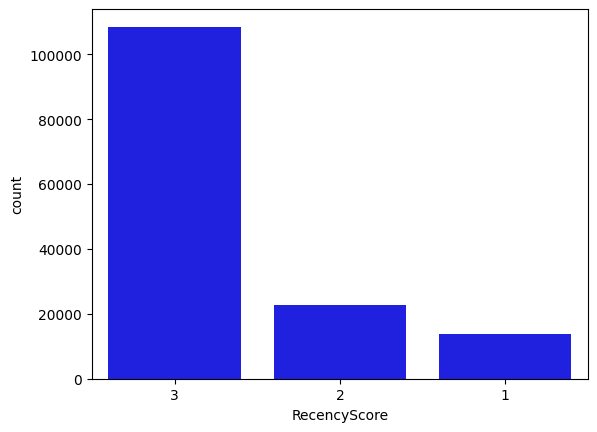

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df_rfm['RecencyScore'], color='blue')
# plt.title('Life Expectancy', fontsize=18)
# plt.xlabel('Life Exp (years)', fontsize=16)
# plt.ylabel('Frequency', fontsize=16)

<Axes: xlabel='FrequencyScore', ylabel='count'>

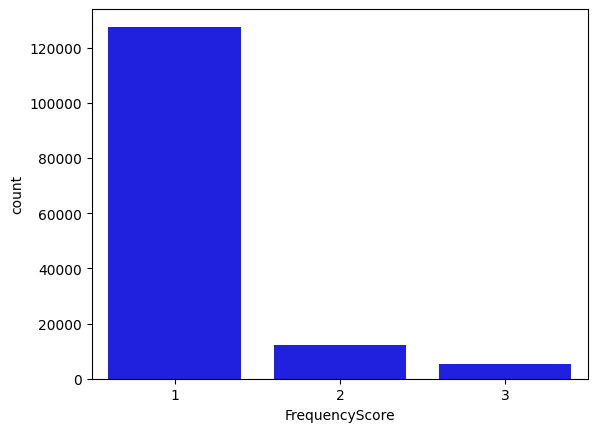

In [ ]:
sns.countplot(x=df_rfm['FrequencyScore'], color='blue')

<Axes: xlabel='MonetaryScore', ylabel='count'>

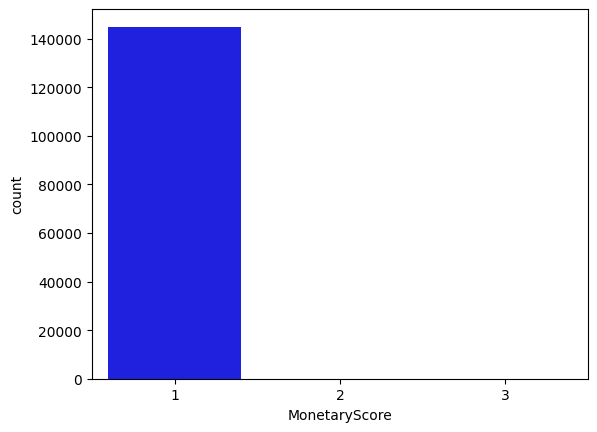

In [ ]:
sns.countplot(x=df_rfm['MonetaryScore'], color='blue')

Phân nhóm dựa trên RFM, danh sách các nhóm được chia tham khảo dựa trên website sau (https://www.stacktome.com/blog/rfm-customer-segmentation)

- Best customers - 333: Đặt cược gần đây, mua thường xuyên và tiêu rất nhiều tiền. Làm cho họ cảm thấy quan trọng và được đánh giá cao. Tiếp thị cho họ một cách thận trọng, không khuyến khích về giá, không cố gắng đạt được tỷ suất lợi nhuận cao. Thống báo với họ về các đợt đặt cược vừa và lớn, cách kết nối trên mạng xã hội và về các chương trình khách hàng thân thiết.
- Loyal customers - X3X: Người đặt cược thường xuyên, trung thành và đáng tin cậy nhất. Có tốc độ tăng trưởng cao về tần suất nhưng có thể giữ nguyên hoặc không cố định ở điểm giá trị gần đây và giá trị tiền tệ.
- High spenders - XX3: Chi tiêu rất nhiều tiền. Có đủ động lực với các sản phẩm hoặc dịch vụ để chi tiêu nhiều hơn sau này. Có thể sẽ tham gia và giữ tư cách thành viên trong một số chương trình khách hàng thân thiết. Nhắm mục tiêu họ với các đợt đặt cược lớn.
- Potential spenders - X(2-3)X2: Khách hàng đặt cược ở mức trùng bình khá
- New high spenders - 313: Đã thực hiện đặt cược đáng kể trong trải nghiệm đặt cược đầu tiên của họ. Để tăng số tiền và chuyển đổi họ thành khách hàng cũ, hãy đưa ra các danh sách về loại cược họ đã đặt và thắng khuyến khích cho lần đặt cược thứ hai bằng email được kích hoạt, hãy hỏi về trải nghiệm của khách hàng trên trang web của bạn. Cung cấp hỗ trợ giới thiệu phù hợp và hiệu quả, xây dựng mối quan hệ.
- Low loyal customers - X31: Đặt cược thường xuyên nhưng không thể chi tiêu nhiều hơn mức họ có thể chi trả. Họ có xu hướng đặt cược một cách cẩn thận, tất cả những gì cần phải làm là đạt được mức tăng số tiền đặt cược của họ cho mỗi lần đặt thông thường. Có thể cung cấp cả phần thưởng thêm nếu thắng.
- Rare high spenders - X13: Không đặt cược thường xuyên nhưng khi đặt họ có thể sẽ chi khá nhiều. Bỏ ra một số tiền lớn nhưng thỉnh thoảng mới quyết định đặt cược. Có thể tận dụng hành vi mua hàng của họ và đăng ký họ làm thành viên theo mùa của bạn. Kết hợp các chiến lược tiếp thị vào kế hoạch tiếp thị và nhắc nhở khi họ tái tương tác.
- At risk customers - 233: Những khách hàng đã mua hàng thường xuyên và chi số tiền lớn nhưng cách đây một thời gian có nguy cơ bị mất vĩnh viễn. Tạo và triển khai chiến lược giữ chân khách hàng.
- Churned customers - 133: Khách hàng tốt nhất đã không đặt cược trong một thời gian dài. Có thể gửi bản khảo sát khách hàng, nhắc nhở họ tham gia đặt cược trở lại đưa ra danh sách các cuộc đặt cược tiềm năng.
- Churned cheap customers - X(1-2)11: Tiêu ít nhất, số lần đặt rất ít, từ lâu đã không có giao dịch nào.
- New customer - 31X(1-2): Khách hàng mới đặt cược và chi tiêu mức trung bình ít
- Low spenders -XX1: Khách hàng chi tiêu ít



In [ ]:
def rfm_group(df):
  for idx, row in df.iterrows():
    if (row['RecencyScore'] == 3) & (row['FrequencyScore'] == 3) & (row['MonetaryScore'] == 3):
      df.at[idx, 'SegmentRFM_group'] = 'Best customers'
    elif (row['RecencyScore'] > 0) & (row['FrequencyScore'] == 3) & (row['MonetaryScore'] > 0):
      df.at[idx, 'SegmentRFM_group'] = 'Loyal customers'
    elif (row['RecencyScore'] > 0) & (row['FrequencyScore'] > 0) & (row['MonetaryScore'] == 3):
      df.at[idx, 'SegmentRFM_group'] = 'High spenders'
    elif (row['RecencyScore'] == 3) & (row['FrequencyScore'] == 1) & (row['MonetaryScore'] == 3):
      df.at[idx, 'SegmentRFM_group'] = 'New high spenders'
    elif (row['RecencyScore'] > 0) & (row['FrequencyScore'] == 3) & (row['MonetaryScore'] == 1):
      df.at[idx, 'SegmentRFM_group'] = 'Low loyal customers'
    elif (row['RecencyScore'] > 0) & (row['FrequencyScore'] == 1) & (row['MonetaryScore'] == 3):
      df.at[idx, 'SegmentRFM_group'] = 'Rare high spenders'
    elif (row['RecencyScore'] == 2) & (row['FrequencyScore'] == 3) & (row['MonetaryScore'] == 3):
      df.at[idx, 'SegmentRFM_group'] = 'At risk customers'
    elif (row['RecencyScore'] == 1) & (row['FrequencyScore'] == 3) & (row['MonetaryScore'] == 3):
      df.at[idx, 'SegmentRFM_group'] = 'Churned customers'
    elif (row['RecencyScore'] < 3) & (row['FrequencyScore'] == 1) & (row['MonetaryScore'] == 1):
      df.at[idx, 'SegmentRFM_group'] = 'Churned cheap customers'
    elif (row['RecencyScore'] == 3) & (row['FrequencyScore'] == 1) & (row['MonetaryScore'] > 0) & (row['MonetaryScore'] <= 2):
      df.at[idx, 'SegmentRFM_group'] = 'New customer'
    elif (row['RecencyScore'] > 0) & (row['FrequencyScore'] > 0) & (row['MonetaryScore'] == 1):
      df.at[idx, 'SegmentRFM_group'] = 'Low spenders'
    elif (row['RecencyScore'] > 1) & (row['FrequencyScore'] > 0) & (row['MonetaryScore'] == 2):
      df.at[idx, 'SegmentRFM_group'] = 'Potential spenders'
  return df

In [ ]:
df_grouprfm = rfm_group(df_rfm)

In [ ]:
df_grouprfm.isnull().sum()

BET_ACCOUNT_NUM_HASH    0
recency                 0
frequency               0
monetary                0
avg_tran_value          0
last_transaction        0
RecencyScore            0
FrequencyScore          0
MonetaryScore           0
SegmentRFM_group        0
dtype: int64

In [ ]:
df_grouprfm.groupby('SegmentRFM_group')['SegmentRFM_group'].count()

SegmentRFM_group
Best customers                 4
Churned cheap customers    36207
Low spenders               12145
Loyal customers             5153
New customer               91355
Potential spenders             5
Name: SegmentRFM_group, dtype: int64

In [ ]:
df_grouprfm

,BET_ACCOUNT_NUM_HASH,recency,frequency,monetary,avg_tran_value,last_transaction,RecencyScore,FrequencyScore,MonetaryScore,SegmentRFM_group
14023,414104496,1,654,3996896.11,6111.461942,2022-12-31,3,3,3,Best customers
52870,1562672387,1,622,4415259.00,7098.487138,2022-12-31,3,3,3,Best customers
57402,1698096372,1,705,4025968.00,5710.592908,2022-12-31,3,3,3,Best customers
89833,2658266703,1,493,5544861.46,11247.183489,2022-12-31,3,3,3,Best customers


In [ ]:
df_grouprfm.loc[df_grouprfm['SegmentRFM_group'].isnull()]

,BET_ACCOUNT_NUM_HASH,recency,frequency,monetary,avg_tran_value,last_transaction,RecencyScore,FrequencyScore,MonetaryScore,SegmentRFM_group


In [ ]:
df_final = df_grouprfm.merge(df_cltv[['BET_ACCOUNT_NUM_HASH','CLV', 'cust_lifetime_value']], on='BET_ACCOUNT_NUM_HASH')

In [ ]:
df_final

,BET_ACCOUNT_NUM_HASH,recency,frequency,monetary,avg_tran_value,last_transaction,RecencyScore,FrequencyScore,MonetaryScore,SegmentRFM_group,CLV,cust_lifetime_value
0,13154,1,463,366186.08,790.898661,2022-12-31,3,2,1,Low spenders,513131.706156,4.203881e+10
1,18379,1,199,32033.00,160.969849,2022-12-31,3,1,1,New customer,104436.557382,6.940575e+08
2,37251,61,1,100.00,100.000000,2022-11-01,3,1,1,New customer,64879.577058,-4.474451e+07
3,129273,13,16,155.00,9.687500,2022-12-19,3,1,1,New customer,6285.209028,3.488291e+04
4,348318,99,4,30.00,7.500000,2022-09-24,3,1,1,New customer,4865.968279,1.342118e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
144864,4294834703,8,335,175772.30,524.693433,2022-12-24,3,2,1,Low spenders,340418.880077,1.112147e+10
144865,4294891076,1,535,72043.91,134.661514,2022-12-31,3,3,1,Loyal customers,87367.820756,1.336853e+09
144866,4294928673,425,1,8.00,8.000000,2021-11-02,2,1,1,Churned cheap customers,5190.366165,1.235390e+04
144867,4294964456,39,1,67.00,67.000000,2022-11-23,3,1,1,New customer,43469.316629,1.318268e+06


In [ ]:
df_final.to_csv('../dataset/segmentation_customer.csv')